In [1]:
'''
Task 1:
•
Objective: Extract product reviews from Amazon and conduct sentiment analysis to discern consumer sentiments using unigram and bigram word clouds.
•
Constraints: Ensure proper data extraction from Amazon's website adhering to ethical and legal considerations while implementing effective sentiment analysis techniques.
Benefits/Impact:
•
By understanding consumer sentiments through sentiment analysis, businesses can identify areas for product improvement, enhance customer satisfaction, and ultimately increase profitability.
Task 2:
•
Objective: Extract movie reviews from IMDB and analyze sentiment to gauge audience perceptions and preferences.
•
Constraints: Respect copyright laws and terms of service of IMDB while extracting data and ensure accurate sentiment analysis to derive meaningful insights from the reviews.
Task 3:
•
Objective: Investigate methods to extract text and perform sentiment analysis on reviews from a chosen website.
•
Constraints: Verify the website's terms of service and policies regarding data extraction and analysis, and ensure the reliability and relevance of the extracted data for meaningful sentiment analysis.
Benefits/Impact:
•
By understanding consumer sentiments through sentiment analysis, businesses can identify areas for product improvement, enhance customer satisfaction, and ultimately increase profitability.
•
Analyzing sentiment from various sources such as e-commerce websites and movie review platforms enables businesses to gain insights into consumer preferences, market trends, and competitor analysis, facilitating informed decision-making and strategic planning.
'''






import requests
from bs4 import BeautifulSoup as bs
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
product_reviews = []


In [3]:
for i in range(1, 21):
  ip = []
  url = 'https://www.amazon.in/product-reviews/B0CHXZHK59/ref=cm_cr_arp_d_viewpnt_lft?ie=UTF8&filterByStar=positive&reviewerType=all_reviews&pageNumber=1#reviews-filter-bar&pageNumber='+str(i)
  response = requests.get(url)
  soup = bs(response.content,"html.parser") # creating soup object to iterate over the extracted content 
  reviews = soup.find_all("span", attrs = {"class","a-size-base review-text review-text-content"}) # Extracting the content under specific tags  
  for i in range(len(reviews)):
    ip.append(reviews[i].text)  
 
  product_reviews = product_reviews + ip  

In [4]:
with open('AppleWatch.txt','w', encoding = 'utf8') as file:
    file.write(str(product_reviews))

In [5]:
watch_string = ' '.join(product_reviews)

In [6]:
from nltk.corpus import stopwords
product_reviews

['\nThis is the first time after much speculations and weighing all the other options I decided to buy an Apple Watch.I’ve been using it for last two months and it’s flawless.It has every feature, and of course, using it with iPhone or iPad Makes it very easy to use .The best part about the watch is it’s connectivity, gestures, of course.It’s battery life is very good. I have to charge once in one and a half day and that’s all ,it last for long, given that it is connected with Wi-Fi whole time.It charges very quickly.When it comes to appearance, I ordered 41 MM, it comes with sports strap band which is really good quality, only if somebody wants a different strap then you can purchase separately otherwise, no need at all.Separately, I ordered a protector and a screen guard.If somebody is looking for new Apple Watch who has never used it, this money is worth, but I’ve heard that people already have previous series watches then there is no point in upgrading. I’ve heard that it is pretty

In [7]:
# Removing unwanted symbols incase they exists
watch_string = re.sub('[^a-zA-Z' ']+', ' ',watch_string).lower()

In [8]:
# Words that are contained in the reviews
watch_words = watch_string.split(' ')

In [9]:
watch_words = watch_words[1:]
watch_words

['this',
 'is',
 'the',
 'first',
 'time',
 'after',
 'much',
 'speculations',
 'and',
 'weighing',
 'all',
 'the',
 'other',
 'options',
 'i',
 'decided',
 'to',
 'buy',
 'an',
 'apple',
 'watch',
 'i',
 've',
 'been',
 'using',
 'it',
 'for',
 'last',
 'two',
 'months',
 'and',
 'it',
 's',
 'flawless',
 'it',
 'has',
 'every',
 'feature',
 'and',
 'of',
 'course',
 'using',
 'it',
 'with',
 'iphone',
 'or',
 'ipad',
 'makes',
 'it',
 'very',
 'easy',
 'to',
 'use',
 'the',
 'best',
 'part',
 'about',
 'the',
 'watch',
 'is',
 'it',
 's',
 'connectivity',
 'gestures',
 'of',
 'course',
 'it',
 's',
 'battery',
 'life',
 'is',
 'very',
 'good',
 'i',
 'have',
 'to',
 'charge',
 'once',
 'in',
 'one',
 'and',
 'a',
 'half',
 'day',
 'and',
 'that',
 's',
 'all',
 'it',
 'last',
 'for',
 'long',
 'given',
 'that',
 'it',
 'is',
 'connected',
 'with',
 'wi',
 'fi',
 'whole',
 'time',
 'it',
 'charges',
 'very',
 'quickly',
 'when',
 'it',
 'comes',
 'to',
 'appearance',
 'i',
 'ordered',

In [10]:
#TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
watch_words

['this',
 'is',
 'the',
 'first',
 'time',
 'after',
 'much',
 'speculations',
 'and',
 'weighing',
 'all',
 'the',
 'other',
 'options',
 'i',
 'decided',
 'to',
 'buy',
 'an',
 'apple',
 'watch',
 'i',
 've',
 'been',
 'using',
 'it',
 'for',
 'last',
 'two',
 'months',
 'and',
 'it',
 's',
 'flawless',
 'it',
 'has',
 'every',
 'feature',
 'and',
 'of',
 'course',
 'using',
 'it',
 'with',
 'iphone',
 'or',
 'ipad',
 'makes',
 'it',
 'very',
 'easy',
 'to',
 'use',
 'the',
 'best',
 'part',
 'about',
 'the',
 'watch',
 'is',
 'it',
 's',
 'connectivity',
 'gestures',
 'of',
 'course',
 'it',
 's',
 'battery',
 'life',
 'is',
 'very',
 'good',
 'i',
 'have',
 'to',
 'charge',
 'once',
 'in',
 'one',
 'and',
 'a',
 'half',
 'day',
 'and',
 'that',
 's',
 'all',
 'it',
 'last',
 'for',
 'long',
 'given',
 'that',
 'it',
 'is',
 'connected',
 'with',
 'wi',
 'fi',
 'whole',
 'time',
 'it',
 'charges',
 'very',
 'quickly',
 'when',
 'it',
 'comes',
 'to',
 'appearance',
 'i',
 'ordered',

In [11]:
vectorizer = TfidfVectorizer(use_idf = True, ngram_range=(1, 1))
x = vectorizer.fit_transform(watch_words)

In [20]:
with open('stop.txt','r') as sw:
    stop_words = sw.read()

In [13]:
stop_words = stop_words.split('\n')

In [14]:
stop_words.extend(["Amazon", "echo", "time", "device", "product", "day"])

In [15]:
watch_words = [w for w in watch_words if not w in stop_words]

In [16]:
# Joining all the reviews into single paragraph
watch_string = ' '.join(watch_words)

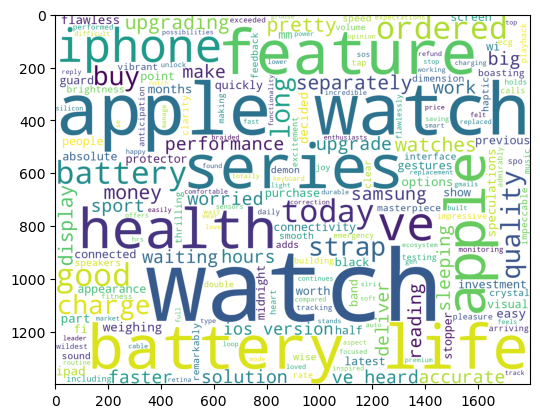

In [17]:
# Corpus level word cloud

wordcloud_ip = WordCloud(background_color = 'White',
                      width = 1800,  height = 1400
                     ).generate(watch_string)
plt.imshow(wordcloud_ip)


In [18]:
with open('positive-words.txt','r') as pos:
    poswords = pos.read().split('\n')
# Perform sentiment analysis
positive_count = 0
for token in watch_words:
    if token in poswords:
        positive_count+=1
total = len(watch_words)
sentiment_score = positive_count/total
print('sentiment score:', sentiment_score)

sentiment score: 0.1426403641881639


In [19]:
with open('negative-words.txt', 'r') as neg:
    negwords = neg.read().split('\n')
# Perform sentiment analysis to analyze negative words
negative_count =0
for token1 in watch_words:
    if token1 in negwords:
        negative_count+=1
sentiment_score1 = negative_count/total
print('negative words ratio:', sentiment_score1)

negative words ratio: 0.027314112291350532


In [20]:
#wordcloud bigram
from wordcloud import WordCloud
from nltk.text import Text


In [21]:
import nltk
wnl = nltk.WordNetLemmatizer()

In [22]:
tokens = nltk.word_tokenize(watch_string)

In [23]:
ist_bigrams = list(nltk.bigrams(watch_words))

In [24]:
list_bigrams

[('speculations', 'weighing'),
 ('weighing', 'options'),
 ('options', 'decided'),
 ('decided', 'buy'),
 ('buy', 'apple'),
 ('apple', 'watch'),
 ('watch', 've'),
 ('ve', 'months'),
 ('months', 'flawless'),
 ('flawless', 'feature'),
 ('feature', 'iphone'),
 ('iphone', 'ipad'),
 ('ipad', 'makes'),
 ('makes', 'easy'),
 ('easy', 'part'),
 ('part', 'watch'),
 ('watch', 'connectivity'),
 ('connectivity', 'gestures'),
 ('gestures', 'battery'),
 ('battery', 'life'),
 ('life', 'good'),
 ('good', 'charge'),
 ('charge', 'half'),
 ('half', 'long'),
 ('long', 'connected'),
 ('connected', 'wi'),
 ('wi', 'fi'),
 ('fi', 'charges'),
 ('charges', 'quickly'),
 ('quickly', 'appearance'),
 ('appearance', 'ordered'),
 ('ordered', 'mm'),
 ('mm', 'sports'),
 ('sports', 'strap'),
 ('strap', 'band'),
 ('band', 'good'),
 ('good', 'quality'),
 ('quality', 'strap'),
 ('strap', 'purchase'),
 ('purchase', 'separately'),
 ('separately', 'separately'),
 ('separately', 'ordered'),
 ('ordered', 'protector'),
 ('protector

In [25]:
dictionary1 = [' '.join(tup)for tup in list_bigrams]
dictionary1

['speculations weighing',
 'weighing options',
 'options decided',
 'decided buy',
 'buy apple',
 'apple watch',
 'watch ve',
 've months',
 'months flawless',
 'flawless feature',
 'feature iphone',
 'iphone ipad',
 'ipad makes',
 'makes easy',
 'easy part',
 'part watch',
 'watch connectivity',
 'connectivity gestures',
 'gestures battery',
 'battery life',
 'life good',
 'good charge',
 'charge half',
 'half long',
 'long connected',
 'connected wi',
 'wi fi',
 'fi charges',
 'charges quickly',
 'quickly appearance',
 'appearance ordered',
 'ordered mm',
 'mm sports',
 'sports strap',
 'strap band',
 'band good',
 'good quality',
 'quality strap',
 'strap purchase',
 'purchase separately',
 'separately separately',
 'separately ordered',
 'ordered protector',
 'protector screen',
 'screen guard',
 'guard apple',
 'apple watch',
 'watch money',
 'money worth',
 'worth ve',
 've heard',
 'heard people',
 'people previous',
 'previous series',
 'series watches',
 'watches point',
 'poi

In [26]:
# Using count vectoriser to view the frequency of bigrams
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
vectorizer = CountVectorizer(ngram_range=(2, 2))
BagOfWords = vectorizer.fit_transform(dictionary1)

In [28]:
vectorizer.vocabulary_

{'speculations weighing': 239,
 'weighing options': 303,
 'options decided': 168,
 'decided buy': 51,
 'buy apple': 31,
 'apple watch': 12,
 'watch ve': 297,
 've months': 270,
 'months flawless': 161,
 'flawless feature': 89,
 'feature iphone': 79,
 'iphone ipad': 129,
 'ipad makes': 128,
 'makes easy': 149,
 'easy part': 66,
 'part watch': 177,
 'watch connectivity': 286,
 'connectivity gestures': 45,
 'gestures battery': 96,
 'battery life': 19,
 'life good': 139,
 'good charge': 98,
 'charge half': 34,
 'half long': 104,
 'long connected': 142,
 'connected wi': 44,
 'wi fi': 304,
 'fi charges': 86,
 'charges quickly': 35,
 'quickly appearance': 199,
 'appearance ordered': 7,
 'ordered mm': 170,
 'mm sports': 156,
 'sports strap': 243,
 'strap band': 247,
 'band good': 17,
 'good quality': 100,
 'quality strap': 198,
 'strap purchase': 248,
 'purchase separately': 196,
 'separately separately': 220,
 'separately ordered': 219,
 'ordered protector': 171,
 'protector screen': 195,
 's

In [29]:
sum_words = BagOfWords.sum(axis=0)

In [30]:
words_freq = [(word, sum_words[0, idx])for word, idx in vectorizer.vocabulary_.items()]

In [31]:
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
words_freq

[('apple watch', 14),
 ('battery life', 10),
 ('buy apple', 4),
 ('ve heard', 4),
 ('watch series', 4),
 ('ios version', 4),
 ('speculations weighing', 2),
 ('weighing options', 2),
 ('options decided', 2),
 ('decided buy', 2),
 ('watch ve', 2),
 ('ve months', 2),
 ('months flawless', 2),
 ('flawless feature', 2),
 ('feature iphone', 2),
 ('iphone ipad', 2),
 ('ipad makes', 2),
 ('makes easy', 2),
 ('easy part', 2),
 ('part watch', 2),
 ('watch connectivity', 2),
 ('connectivity gestures', 2),
 ('gestures battery', 2),
 ('life good', 2),
 ('good charge', 2),
 ('charge half', 2),
 ('half long', 2),
 ('long connected', 2),
 ('connected wi', 2),
 ('wi fi', 2),
 ('fi charges', 2),
 ('charges quickly', 2),
 ('quickly appearance', 2),
 ('appearance ordered', 2),
 ('ordered mm', 2),
 ('mm sports', 2),
 ('sports strap', 2),
 ('strap band', 2),
 ('band good', 2),
 ('good quality', 2),
 ('quality strap', 2),
 ('strap purchase', 2),
 ('purchase separately', 2),
 ('separately separately', 2),
 ('s

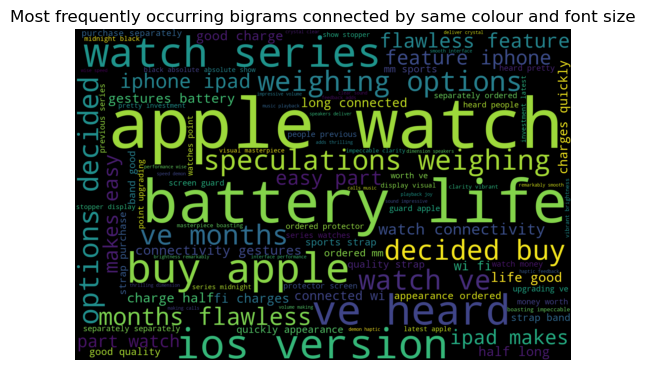

In [32]:
# Generating wordcloud
words_dict = dict(words_freq)
WC_height = 1000
WC_width = 1500
WC_max_words = 100
wordCloud = WordCloud(max_words = WC_max_words, height = WC_height, width = WC_width, stopwords = stop_words)

wordCloud.generate_from_frequencies(words_dict)
plt.figure(4)
plt.title('Most frequently occurring bigrams connected by same colour and font size')
plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [33]:
#problem2:

In [34]:
imdb = []

In [35]:
for i in range(1, 15):
    ip1 = []
    # Form the URL with the page number
    url = f'https://www.imdb.com/title/tt10090796/reviews?ref_=tt_urv&page={i}'
    response1 = requests.get(url)
    soup1 = bs(response1.content, 'html.parser')
    # Find all review text elements
    reviews1 = soup1.find_all('div', class_='text show-more__control')
    # Append review texts to ip1 list
    for review in reviews1:
        ip1.append(review.text.strip())
    # Extend ip1 to imdb list
    imdb.extend(ip1)

In [36]:
with open('Game of Thrones.txt', 'w', encoding = 'utf8') as file1:
    file1.write(str(imdb))

In [37]:
imdb_string = ' '.join(imdb)

In [38]:
# Removing unwanted symbols incase they exists
imdb_string = re.sub('[^a-zA-Z' ']+', ' ', imdb_string).lower()
imdb_string = re.sub('[0-9' ']+', ' ', imdb_string).lower()

In [39]:
imdb_words = imdb_string.split(' ')

In [40]:
#TFIDF
vectorizer1 = TfidfVectorizer(use_idf = True, ngram_range=(1, 1))
x1 = vectorizer1.fit_transform(imdb_words)

In [41]:
imdb_words = [w for w  in imdb_words if not w in stop_words]
imdb_words = ' '.join(imdb_words)
imdb_words = imdb_words.split('\n')

In [42]:
#sentiment analysis
from textblob import TextBlob
for w1 in imdb_words:
    blob = TextBlob(w1)
    sentiment_polarity = blob.sentiment.polarity
    if sentiment_polarity > 0:
        sentiment_label = 'positive'
    elif sentiment_polarity < 0:
        sentiment_label = 'negative'
    else:
        sentiment_label = 'newtral'
    print('sentiment_score:', sentiment_label)

sentiment_score: positive


In [43]:
#problem3:

In [2]:
oneplus_reviews = []

In [3]:
for i2 in range(1, 15):
  ip2 = []  
  url1 = "https://www.amazon.in/OnePlus-Display-Storage-4000mAH-Battery/product-reviews/B07HGJK535/ref=cm_cr_getr_d_paging_btm_next_3?ie=UTF8&reviewerType=all_reviews&pageNumber="+str(i2)  
  response2 = requests.get(url1)
  soup2 = bs(response2.content,"html.parser") # creating soup object to iterate over the extracted content 
  reviews2 = soup2.find_all("span", attrs = {"class","a-size-base review-text review-text-content"}) # Extracting the content under specific tags  
  for j2 in range(len(reviews2)):
    ip2.append(reviews2[j2].text)  
 
  oneplus_reviews = oneplus_reviews + ip2  # adding the reviews of one page to empty list which in future contains all the reviews


In [4]:
with open('oneplus.txt','w', encoding = 'utf8') as one:
    one.write(str(oneplus_reviews))

In [5]:
# Joining all the reviews into single paragraph 
oneplus_string = ' '.join(oneplus_reviews)

In [6]:
oneplus_string = re.sub('[^a-zA-Z' ']+', ' ', oneplus_string).lower()
oneplus_string = re.sub('[0-9]+', ' ', oneplus_string).lower()

In [14]:
oneplus_words = oneplus_string.split(' ')

In [15]:
oneplus_words = oneplus_words[1:]

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
one_vectorizers = TfidfVectorizer(use_idf = True, ngram_range=(1, 1))
one_vectors = one_vectorizers.fit_transform(oneplus_words)

In [18]:
with open('stop.txt', 'r', encoding = 'utf8') as st:
    stopwords = st.read().split('\n')
with open('positive-words.txt','r', encoding = 'utf8') as p:
    poswords1 = p.read()
with open('negative-words.txt', 'r', encoding ='utf8') as n:
    negword1 = n.read()

In [19]:
stopwords1list = stopwords

In [21]:
oneplus_words = [w for w in oneplus_words if w not in stopwords1list]

In [24]:
#sentiment analysis
positive = 0
for token1 in oneplus_words:
    if token1 in poswords1:
        positive +=1
total_one = len(oneplus_words)
sentiment_oneplus = total_one/positive
print('Sentiment Score:', sentiment_oneplus)

Sentiment Score: 3.506300114547537


In [25]:
#some time total/positive or negative method might not be correct

In [26]:
from textblob import TextBlob
for token2 in oneplus_words:
    blob = TextBlob(token2)
    sentiment_polarity = blob.sentiment.polarity
    if sentiment_polarity > 0:
        s_label = 'positive'
    elif sentiment_polarity <0:
        s_label = 'negative'
    else:
        s_label = 'newtral'
    print('sentiment score:', s_label)

sentiment score: newtral
sentiment score: newtral
sentiment score: negative
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: positive
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: positive
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: positive
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: negative
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: new

sentiment score: newtral
sentiment score: positive
sentiment score: newtral
sentiment score: newtral
sentiment score: negative
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtra

sentiment score: newtral
sentiment score: positive
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: positive
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: positive
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: positive
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: positive
sentiment score: newtral
sentiment score: new

sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: positive
sentiment score: newtral
sentiment score: newtral
sentiment score: positive
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: positive
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: negative
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: newtral
sentiment score: negative
sentiment score: newtral
sentiment score: newtral
sentiment score: new